# Assignment 1

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math

In [3]:
Random_state=24

## Importing Data

In [4]:
X,y=datasets.make_moons(n_samples=1000,shuffle=True,noise=0.2,random_state=Random_state)

In [5]:
df=pd.DataFrame(X,columns=["A","B"])

In [6]:
df["y"]=y

In [7]:
df.head()

,A,B,y
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


In [8]:
df.describe()

,A,B,y
count,1000.000000,1000.000000,1000.00000
mean,0.490841,0.239025,0.50000
std,0.898951,0.540082,0.50025
min,-1.688795,-0.955280,0.00000
25%,-0.149565,-0.205090,0.00000
50%,0.500100,0.241163,0.50000
75%,1.095048,0.680394,1.00000
max,2.419113,1.612075,1.00000


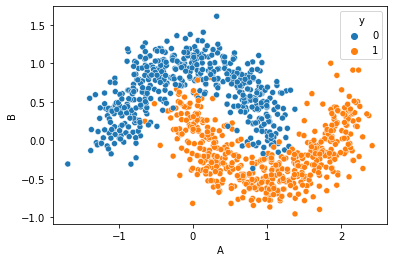

In [9]:
sns.scatterplot(x=df.A,y=df.B,hue=df.y)

In [10]:
Result_df=pd.DataFrame(columns=["Accuracy","Remark"])

In [11]:
#To store result in the dataframe
def Save_Result(Accuracy):
    global Result_df
    print("Accuracy : ",Accuracy)
    Remark=input("Please Enter Remark : ")
    result={"Accuracy":Accuracy,"Remark":Remark}
    Result_df=Result_df.append(result,ignore_index=True)
    print("Data Saved")
#     print(Result_df)
    return True

## Normalization

In [12]:
def norm_std(data):
    std=StandardScaler()
    norm_data=std.fit_transform(data.iloc[:,:-1])
    norm_data=pd.DataFrame(norm_data,columns=["A","B"])
    pd.concat([norm_data,data[["y"]]],axis=1,ignore_index=True)
    return norm_data

In [13]:
def norm_Zscore(data):
    min_max=MinMaxScaler()
    norm_data=min_max.fit_transform(data)
    return pd.DataFrame(norm_data,columns=["A","B","y"])

In [14]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

## Predict Function

In [15]:
def predict(row_weight,row_values):
    # Equition
    z=row_weight[-1] # b->intercept
    
    for i in range(len(row_values)-1):
        z+=row_weight[i]*row_values[i]

    return sigmoid(z)
#     if z>=0:
#         return 1
#     return 0

## To get just independent variable

In [16]:
def get_info(i):
    return i[:-1]

In [17]:
weights=[-1, -1, 1]
info=get_info(df.iloc[0])
predict(info,weights)

0.28774947000691203

## Train Test Split

In [18]:
def train_model(train,alpha=.5,learning_rate=0.01,n_epoch=10):
    error_list=[]
    #Randam weight intialization
    #[w1,w2,b]
    weights=np.random.rand(train.shape[1])
#     weights=[0.5966775 , 0.38021512, 0.55997561]
    print(weights,alpha*(weights[0]**2 + weights[1]**2))
    for epoch in range(n_epoch):
#         print("*"*10+" Epoch "+str(epoch)+" "+ "*"*10)
        epoch_error=0.0
        for row in train:
            
            #To calculate prediction of each recored
            y_hat=predict(weights,get_info(row))
            
            #Calculate individual Loss 
            #individual_error = row[-1]-y_hat
            individual_error = (-row[-1]*np.log(y_hat)+(1-row[-1])*np.log(1-y_hat)) 
            
            # weight updation SGD based on each epoch
            for i in range(len(row)-1):
                weights[i]=weights[i]+learning_rate*individual_error*row[i]

            weights[-1]=weights[-1]+learning_rate*individual_error
            
            #Add individual loss to epoch_loss
            epoch_error+=individual_error
            
            
        # Early stopping condition
        if epoch>6 and all(i >= epoch_error for i in error_list[-5:]):
            print("Error : ",epoch_error)
            print("Early stopping at epoch at : ",epoch,"th epoch")
            print("Final weights : ",weights)
            return weights , error_list

        print("Error : ",epoch_error)
        error_list.append(epoch_error)
        
    print("Final weights : ",weights)
    
    return weights , error_list

## Prediction on test data

## Final result

In [22]:
def Prediction(final_weights,test_df):
    y_hat_final=[]
    for i in test_df.values:
        y_hat=predict(final_weights,i)
        y_hat_final.append(y_hat)
    y_hat_bin=[]
    y_hat_bin=np.where(np.array(y_hat_final)>=.5,1,0)
    print("confusion_matrix : \n",confusion_matrix(test.y,y_hat_bin))
    accuracy=accuracy_score(test.y,y_hat_bin)
    Save_Result(accuracy)
    return True

In [24]:
train,test=df.iloc[:800],df.iloc[800:]

In [42]:
learning_rate=0.01
epoch=50
alpha=1
final_weights,error=train_model(train.values,alpha,learning_rate,epoch)

[0.5966775, 0.38021512, 0.55997561] 0.5005875764828643
********** Epoch 0 **********
Error :  -93.1984476021013
********** Epoch 1 **********
Error :  -15.242375273268259
********** Epoch 2 **********
Error :  -5.009651363837438
********** Epoch 3 **********
Error :  -1.8161735618175199
********** Epoch 4 **********
Error :  -0.6754541224454569
********** Epoch 5 **********
Error :  -0.2534410842806225
********** Epoch 6 **********
Error :  -0.09540601108853407
********** Epoch 7 **********
Error :  -0.03595881428256541
********** Epoch 8 **********
Error :  -0.013559220776495087
********** Epoch 9 **********
Error :  -0.00511374857985783
********** Epoch 10 **********
Error :  -0.0019287342489720527
********** Epoch 11 **********
Error :  -0.0007274717218420101
********** Epoch 12 **********
Error :  -0.0002743872182802004
********** Epoch 13 **********
Error :  -0.0001034935204459464
********** Epoch 14 **********
Error :  -3.903579414830938e-05
********** Epoch 15 **********
Error :

In [43]:
Prediction(final_weights,test) #Result with Original Data

confusion_matrix : 
 [[112   5]
 [ 20  63]]
Accuracy :  0.875
Please Enter Remark : Original data epoch 50 LR =0.01
Data Saved


True

## With min-max

In [34]:
min_max_df=norm_Zscore(df)

In [35]:
mm_train,mm_test=min_max_df.iloc[:800],min_max_df.iloc[800:]

In [49]:
learning_rate=0.1
epoch=80
alpha=1
mm_final_weights,error=train_model(mm_train.values,alpha,learning_rate,epoch)

[0.5966775, 0.38021512, 0.55997561] 0.5005875764828643
********** Epoch 0 **********
Error :  -23.409336140741473
********** Epoch 1 **********
Error :  -6.309333133271006
********** Epoch 2 **********
Error :  -3.0125479341153283
********** Epoch 3 **********
Error :  -1.5481046502951625
********** Epoch 4 **********
Error :  -0.8226655239691995
********** Epoch 5 **********
Error :  -0.44454515436275444
********** Epoch 6 **********
Error :  -0.24233077833641736
********** Epoch 7 **********
Error :  -0.1327198565973377
********** Epoch 8 **********
Error :  -0.07287300565537108
********** Epoch 9 **********
Error :  -0.04006822372332172
********** Epoch 10 **********
Error :  -0.022047729303684635
********** Epoch 11 **********
Error :  -0.012136938162025934
********** Epoch 12 **********
Error :  -0.006682734852905728
********** Epoch 13 **********
Error :  -0.003680054548481415
********** Epoch 14 **********
Error :  -0.002026676937619737
********** Epoch 15 **********
Error :  -0

In [50]:
Prediction(mm_final_weights,mm_test) #Result with Min-Max

confusion_matrix : 
 [[117   0]
 [ 82   1]]
Accuracy :  0.59
Please Enter Remark : With Min-Max epoch 80
Data Saved


True

## Standard-Normalization

In [38]:
std_df=norm_std(df)
std_train,std_test=std_df.iloc[:800],std_df.iloc[800:]

In [45]:
learning_rate=0.01
epoch=50
alpha=1
std_final_weights,error=train_model(std_train.values,alpha,learning_rate,epoch)

[0.5966775, 0.38021512, 0.55997561] 0.5005875764828643
********** Epoch 0 **********
Error :  -305.3760133046203
********** Epoch 1 **********
Error :  -134.71142348447975
********** Epoch 2 **********
Error :  -136.24671122977452
********** Epoch 3 **********
Error :  -165.6758932468283
********** Epoch 4 **********
Error :  -213.2923110293969
********** Epoch 5 **********
Error :  -278.58279301523123
********** Epoch 6 **********
Error :  -364.75559857482716
********** Epoch 7 **********
Error :  -477.7012394109405
Early stopping at epoch at :  7 th epoch
Final weights :  [-195.9186363919652, 0.38021512, -20.20344422296103]


In [46]:
Prediction(std_final_weights,std_test) #Result with Standard Normalization

confusion_matrix : 
 [[35 82]
 [62 21]]
Accuracy :  0.28
Please Enter Remark : Std with epoch 50 LR=0.01
Data Saved


True

# Final Result

In [51]:
Result_df

,Accuracy,Remark
0,0.870,Result with Original Data
1,0.590,Result with Min-Max
2,0.275,Result with Standard Normalization
3,0.875,Original data epoch 50 LR =0.01
4,0.280,Std with epoch 50 LR=0.01
5,0.590,With Min-Max epoch 80
